In [1]:
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# machine learning stack
from sklearn.preprocessing import (
    PolynomialFeatures,
    OneHotEncoder
)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import  make_column_transformer
# time-related stack
from datetime import datetime as dt

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/daily_gold_rate.csv')


In [3]:
df.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1/1/1985,308.30,402.45,266.01,3825.85,1134.42,NaN
1,1/2/1985,305.50,401.49,266.00,3787.05,1134.42,NaN
2,1/3/1985,302.30,397.08,262.76,3718.88,1107.67,NaN
3,1/4/1985,303.15,397.15,262.58,3759.64,1118.21,NaN
4,1/7/1985,298.25,392.55,261.17,3741.23,1091.58,835.8


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.set_index('Date', inplace=True)
df['year']=df.index.year
df['month']=df.index.month
df['days']=df.index.day

df['time_index'] = np.arange(len(df))
df

,USD,EUR,GBP,INR,AED,CNY,year,month,days,time_index
Date,,,,,,,,,,
1985-01-01,308.30,402.45,266.01,3825.85,1134.42,NaN,1985,1,1,0
1985-01-02,305.50,401.49,266.00,3787.05,1134.42,NaN,1985,1,2,1
1985-01-03,302.30,397.08,262.76,3718.88,1107.67,NaN,1985,1,3,2
1985-01-04,303.15,397.15,262.58,3759.64,1118.21,NaN,1985,1,4,3
1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.80,1985,1,7,4
...,...,...,...,...,...,...,...,...,...,...
2023-10-02,1833.05,1747.59,1513.92,152333.60,6732.79,13377.60,2023,10,2,10109
2023-10-03,1822.45,1741.97,1509.28,151684.52,6693.86,13300.24,2023,10,3,10110
2023-10-04,1818.95,1730.36,1496.83,151375.75,6680.82,13274.70,2023,10,4,10111


In [6]:
# train test for testing purpose
# train = df.loc[df.year <= 2015,["year", "month","time_index"]]
# test = df.loc[df.year > 2015,["year", "month","time_index"]]
# y_train = df.loc[df.year <= 2015,'USD']
# y_test = df.loc[df.year > 2015,'USD']

In [7]:
# lets train with entire df
train = df.loc[:,["year", "month","time_index"]]
y_train = df.loc[:,'USD']


In [8]:
train,y_train

(            year  month  time_index
 Date                               
 1985-01-01  1985      1           0
 1985-01-02  1985      1           1
 1985-01-03  1985      1           2
 1985-01-04  1985      1           3
 1985-01-07  1985      1           4
 ...          ...    ...         ...
 2023-10-02  2023     10       10109
 2023-10-03  2023     10       10110
 2023-10-04  2023     10       10111
 2023-10-05  2023     10       10112
 2023-10-06  2023     10       10113
 
 [10114 rows x 3 columns],
 Date
 1985-01-01     308.30
 1985-01-02     305.50
 1985-01-03     302.30
 1985-01-04     303.15
 1985-01-07     298.25
                ...   
 2023-10-02    1833.05
 2023-10-03    1822.45
 2023-10-04    1818.95
 2023-10-05    1819.45
 2023-10-06    1819.60
 Name: USD, Length: 10114, dtype: float64)

In [9]:
train

,year,month,time_index
Date,,,
1985-01-01,1985,1,0
1985-01-02,1985,1,1
1985-01-03,1985,1,2
1985-01-04,1985,1,3
1985-01-07,1985,1,4
...,...,...,...
2023-10-02,2023,10,10109
2023-10-03,2023,10,10110
2023-10-04,2023,10,10111


In [10]:
# time_one_hot = make_pipeline(
#     OneHotEncoder(drop='first')
# )

In [11]:
time_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore',drop='first'), ['month']),
    # (PolynomialFeatures(),['month','year']),
    remainder='passthrough')

In [12]:
train_fe =time_transformer.fit_transform(train)
# test_fe =time_transformer.transform(test)

In [13]:
# time_transformer.get_feature_names_out()

In [14]:
# train_fe.todense() #to convert into a matrix 

In [15]:
# pd.DataFrame(train_fe.todense(),columns=time_transformer.get_feature_names_out())

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(train_fe,y_train)

LinearRegression()

In [18]:
# y_pred_test= lr.predict(test_fe)
y_pred_train = lr.predict(train_fe)
#y_pred_test

In [19]:
pd.DataFrame(y_pred_train,index=y_train.index)

,0
Date,
1985-01-01,-12.253741
1985-01-02,-12.138861
1985-01-03,-12.023981
1985-01-04,-11.909101
1985-01-07,-11.794221
...,...
2023-10-02,1609.294938
2023-10-03,1609.409818
2023-10-04,1609.524698


In [20]:
plot_df =train.join(y_train).join(pd.DataFrame({"train_pred":y_pred_train},index=y_train.index))

<Axes: xlabel='Date'>

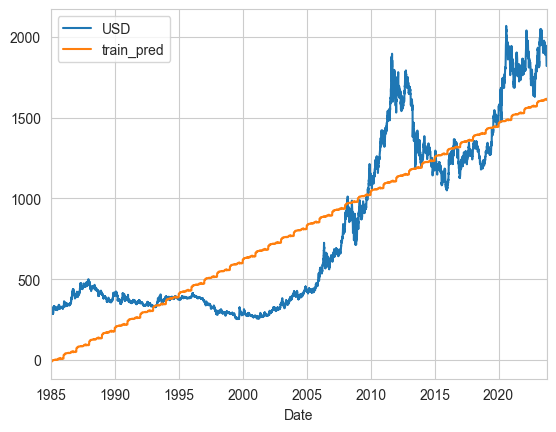

In [21]:
plot_df[['USD','train_pred']].plot()

In [22]:
remainder = y_train - y_pred_train

<Axes: xlabel='Date'>

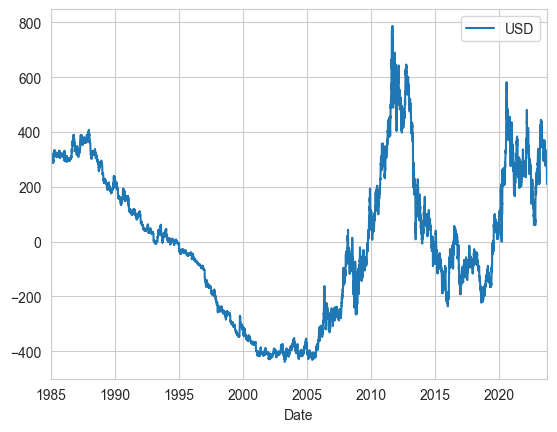

In [23]:
pd.DataFrame(remainder,index=train.index).plot()

In [24]:
import statsmodels.api as sm
sm.tsa.stattools.pacf(remainder, nlags=None, method='ywadjusted', alpha=None)

array([ 1.00000000e+00,  9.99319435e-01,  1.83644239e-02,  1.18374113e-02,
        5.05457693e-03,  1.57085917e-02, -1.43584364e-02,  4.11820618e-02,
       -6.85747572e-03, -9.42645244e-03, -3.29528964e-02,  1.05449181e-02,
        4.14811828e-02, -1.93693873e-02, -3.97407322e-02,  1.34219706e-02,
        2.84283393e-02,  1.04629967e-02,  2.58800965e-03,  1.98940545e-02,
       -3.82169556e-03, -2.16387547e-02,  5.24904648e-02, -2.15007177e-02,
        7.41998653e-03,  2.04148087e-02, -2.68361758e-03, -4.33935898e-03,
        2.24571743e-02,  5.35958530e-03, -2.54967279e-02,  1.14724142e-02,
        6.26639799e-03,  1.78389356e-02, -9.82014961e-03,  2.40288674e-03,
        1.82930140e-02,  4.05514696e-04,  1.70177530e-02, -3.91716616e-03,
       -2.71736446e-02])

Text(0, 0.5, 'Partial Autocorrelation')

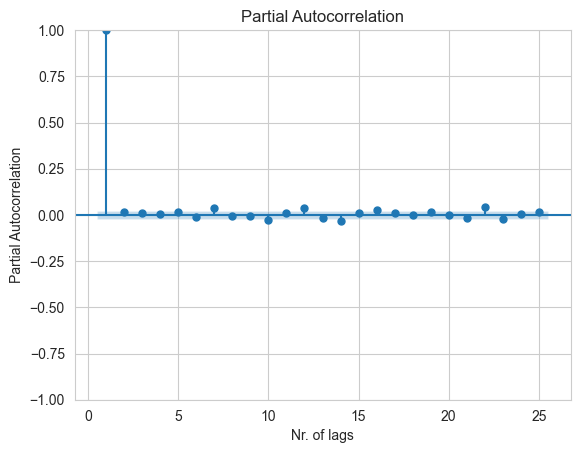

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(remainder,zero=False,lags=25)
plt.xlabel('Nr. of lags')
plt.ylabel('Partial Autocorrelation')

Text(0, 0.5, 'Partial Autocorrelation')

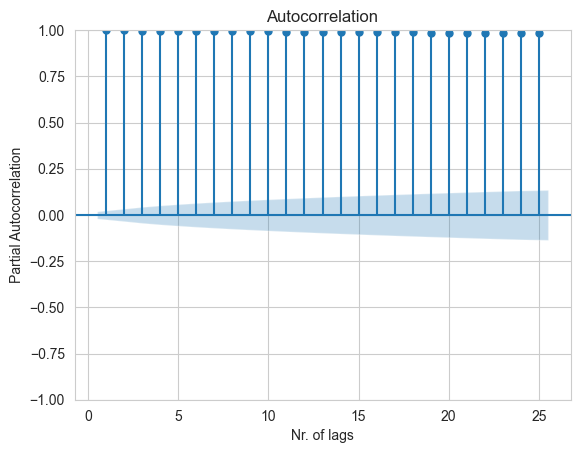

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(remainder,zero=False,lags=25)
plt.xlabel('Nr. of lags')
plt.ylabel('Partial Autocorrelation')

In [27]:
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(y_train, maxlag=13)
mod.ar_lags

c:\Users\Khush\Capstone-Project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\Khush\Capstone-Project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


[1]

In [28]:
mod = ar_select_order(y_train, maxlag=13)
mod.ar_lags


c:\Users\Khush\Capstone-Project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\Khush\Capstone-Project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


[1]

In [29]:
# remainder_test = y_test-y_pred_test

In [30]:
train['remainder'] = remainder
train
# test['remainder'] = remainder_test


,year,month,time_index,remainder
Date,,,,
1985-01-01,1985,1,0,320.553741
1985-01-02,1985,1,1,317.638861
1985-01-03,1985,1,2,314.323981
1985-01-04,1985,1,3,315.059101
1985-01-07,1985,1,4,310.044221
...,...,...,...,...
2023-10-02,2023,10,10109,223.755062
2023-10-03,2023,10,10110,213.040182
2023-10-04,2023,10,10111,209.425302


In [31]:
train['lag1'] = train['remainder'].shift(1)
train
# test['lag1'] = test['remainder'].shift(1)
# test


,year,month,time_index,remainder,lag1
Date,,,,,
1985-01-01,1985,1,0,320.553741,NaN
1985-01-02,1985,1,1,317.638861,320.553741
1985-01-03,1985,1,2,314.323981,317.638861
1985-01-04,1985,1,3,315.059101,314.323981
1985-01-07,1985,1,4,310.044221,315.059101
...,...,...,...,...,...
2023-10-02,2023,10,10109,223.755062,254.212398
2023-10-03,2023,10,10110,213.040182,223.755062
2023-10-04,2023,10,10111,209.425302,213.040182


In [32]:
train.drop('remainder',axis=1)
# test.drop('remainder',axis=1)

,year,month,time_index,lag1
Date,,,,
1985-01-01,1985,1,0,NaN
1985-01-02,1985,1,1,320.553741
1985-01-03,1985,1,2,317.638861
1985-01-04,1985,1,3,314.323981
1985-01-07,1985,1,4,315.059101
...,...,...,...,...
2023-10-02,2023,10,10109,254.212398
2023-10-03,2023,10,10110,223.755062
2023-10-04,2023,10,10111,213.040182


In [33]:
train_fe_lag = time_transformer.fit_transform(train.drop('remainder',axis=1).dropna())
# test_fe_lag = time_transformer.transform(test.drop('remainder',axis=1).dropna())

In [34]:
lr.fit(train_fe_lag,y_train[1:])

LinearRegression()

In [35]:
ypred_train_tsl = lr.predict(train_fe_lag)
ypred_train_tsl

array([ 308.06366804,  305.26571647,  302.06805221, ..., 1822.60763554,
       1819.11018675, 1819.60986498])

In [36]:
len(ypred_train_tsl)

10113

In [37]:
pd.DataFrame(train_fe_lag.todense(),columns=time_transformer.get_feature_names_out())

,onehotencoder__month_2,onehotencoder__month_3,onehotencoder__month_4,onehotencoder__month_5,onehotencoder__month_6,onehotencoder__month_7,onehotencoder__month_8,onehotencoder__month_9,onehotencoder__month_10,onehotencoder__month_11,onehotencoder__month_12,remainder__year,remainder__time_index,remainder__lag1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985.0,1.0,320.553741
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985.0,2.0,317.638861
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985.0,3.0,314.323981
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985.0,4.0,315.059101
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985.0,5.0,310.044221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2023.0,10109.0,254.212398
10109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2023.0,10110.0,223.755062
10110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2023.0,10111.0,213.040182
10111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2023.0,10112.0,209.425302


In [38]:


# Convert train_fe_lag to a DataFrame if it's not already one
df = pd.DataFrame(train_fe_lag.todense(), columns=time_transformer.get_feature_names_out())

# Define the new row as a DataFrame
new_row = pd.DataFrame({
    'onehotencoder__month_2': [0],
    'onehotencoder__month_3': [0],
    'onehotencoder__month_4': [0],
    'onehotencoder__month_5': [0],
    'onehotencoder__month_6': [0],
    'onehotencoder__month_7': [1],
    'onehotencoder__month_8': [0],
    'onehotencoder__month_9': [0],
    'onehotencoder__month_10': [0],
    'onehotencoder__month_11': [0],
    'onehotencoder__month_12': [0],
    'remainder__year': [2023],
    'remainder__time_index': [10114],
    'remainder__lag1': [209.845542]
})
    
# Concatenate the new row to the existing DataFrame
df = pd.concat([df, new_row], ignore_index=True)




In [39]:
lr.predict(df)[-1]

1822.52186725301

In [40]:
ypred_train_tsl

array([ 308.06366804,  305.26571647,  302.06805221, ..., 1822.60763554,
       1819.11018675, 1819.60986498])

In [41]:
plot_df[1:].join(pd.DataFrame({"trend_seasonal_lag_pred":ypred_train_tsl},index=plot_df[1:].index))[['trend_seasonal_lag_pred']]

,trend_seasonal_lag_pred
Date,
1985-01-02,308.063668
1985-01-03,305.265716
1985-01-04,302.068052
1985-01-07,302.917479
1985-01-08,298.021036
...,...
2023-10-02,1863.520610
2023-10-03,1833.199985
2023-10-04,1822.607636


In [42]:
pd.to_datetime("2023-10-06")

Timestamp('2023-10-06 00:00:00')

<Axes: xlabel='Date'>

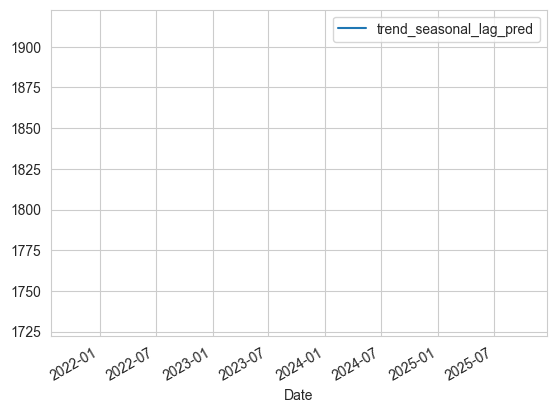

In [43]:
pd.DataFrame({"trend_seasonal_lag_pred":[lr.predict(df)[-1]],"Date":pd.to_datetime("2023-10-07")}).set_index("Date").plot()

In [44]:
train

,year,month,time_index,remainder,lag1
Date,,,,,
1985-01-01,1985,1,0,320.553741,NaN
1985-01-02,1985,1,1,317.638861,320.553741
1985-01-03,1985,1,2,314.323981,317.638861
1985-01-04,1985,1,3,315.059101,314.323981
1985-01-07,1985,1,4,310.044221,315.059101
...,...,...,...,...,...
2023-10-02,2023,10,10109,223.755062,254.212398
2023-10-03,2023,10,10110,213.040182,223.755062
2023-10-04,2023,10,10111,209.425302,213.040182


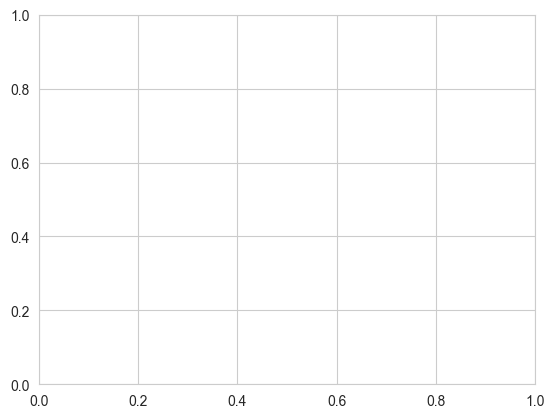

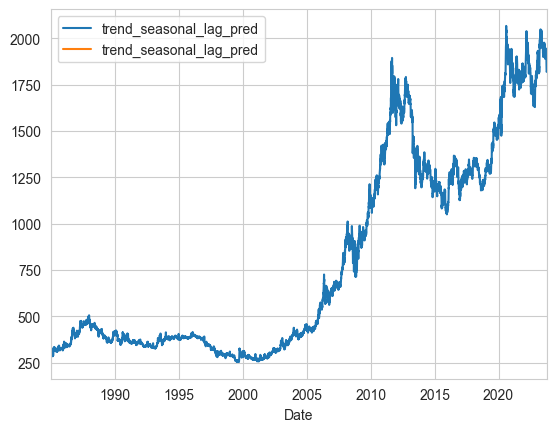

In [45]:
fig, axes = plt.subplots(1,1)
ax = plot_df[1:].join(pd.DataFrame({"trend_seasonal_lag_pred":ypred_train_tsl},index=plot_df[1:].index))[['trend_seasonal_lag_pred']].plot()
_ = pd.DataFrame({"trend_seasonal_lag_pred":[lr.predict(df)[-1]],"Date":pd.to_datetime("2023-10-07")}).set_index("Date").plot(ax=ax)

<Axes: >

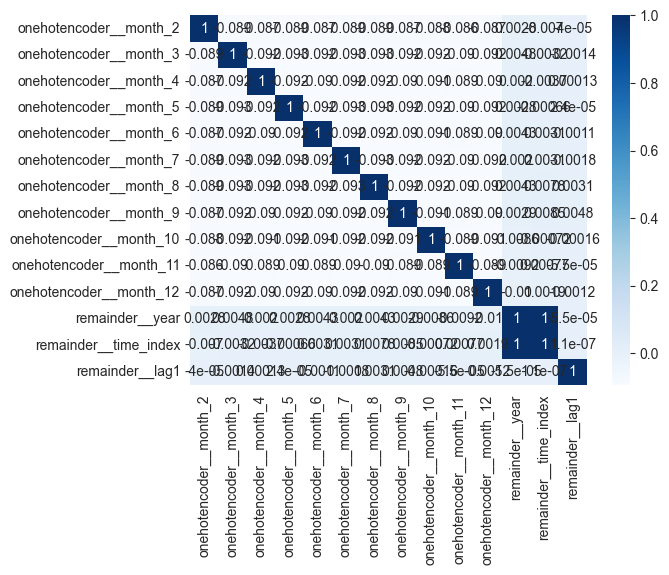

In [46]:
import seaborn as sns
sns.heatmap(df.dropna().corr(),cmap='Blues',annot=True)

In [47]:
df_forecast = pd.DataFrame({
    'Date': pd.date_range(start='2023-10-07', periods=366)
})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])
df_forecast.set_index('Date', inplace=True)
df_forecast['year']=df_forecast.index.year
df_forecast['month']=df_forecast.index.month

df_forecast['time_index'] = np.arange(10114,10480,1)
df_forecast['lag1'] = 0
df_forecast.iloc[0,3]= 209.845542
df_forecast

,year,month,time_index,lag1
Date,,,,
2023-10-07,2023,10,10114,209.845542
2023-10-08,2023,10,10115,0.000000
2023-10-09,2023,10,10116,0.000000
2023-10-10,2023,10,10117,0.000000
2023-10-11,2023,10,10118,0.000000
...,...,...,...,...
2024-10-02,2024,10,10475,0.000000
2024-10-03,2024,10,10476,0.000000
2024-10-04,2024,10,10477,0.000000


In [48]:
df_forecast['future_forecast'] = lr.predict(time_transformer.transform(df_forecast))
df_forecast

,year,month,time_index,lag1,future_forecast
Date,,,,,
2023-10-07,2023,10,10114,209.845542,1819.759794
2023-10-08,2023,10,10115,0.000000,1610.179807
2023-10-09,2023,10,10116,0.000000,1610.294642
2023-10-10,2023,10,10117,0.000000,1610.409477
2023-10-11,2023,10,10118,0.000000,1610.524312
...,...,...,...,...,...
2024-10-02,2024,10,10475,0.000000,1663.778543
2024-10-03,2024,10,10476,0.000000,1663.893378
2024-10-04,2024,10,10477,0.000000,1664.008213


In [49]:
train_plot_df = plot_df[1:].join(pd.DataFrame({"trend_seasonal_lag_pred":ypred_train_tsl},index=plot_df[1:].index))[['trend_seasonal_lag_pred']]
train_plot_df

,trend_seasonal_lag_pred
Date,
1985-01-02,308.063668
1985-01-03,305.265716
1985-01-04,302.068052
1985-01-07,302.917479
1985-01-08,298.021036
...,...
2023-10-02,1863.520610
2023-10-03,1833.199985
2023-10-04,1822.607636


In [50]:
df_forecast['future_forecast']

Date
2023-10-07    1819.759794
2023-10-08    1610.179807
2023-10-09    1610.294642
2023-10-10    1610.409477
2023-10-11    1610.524312
                 ...     
2024-10-02    1663.778543
2024-10-03    1663.893378
2024-10-04    1664.008213
2024-10-05    1664.123048
2024-10-06    1664.237883
Name: future_forecast, Length: 366, dtype: float64

In [51]:
# pip install nbformat

In [61]:
import plotly.express as px

px.line(train_plot_df)
# Create the first line chart
fig = px.line(train_plot_df, title='Gold Price forecasting')

# Add the second line chart to the same figure
fig.add_scatter(x = df_forecast.index, y= df_forecast['future_forecast'], mode='lines', name='next 1 year of gold prices from 2023-10-06')

# Show the plot
fig.show()

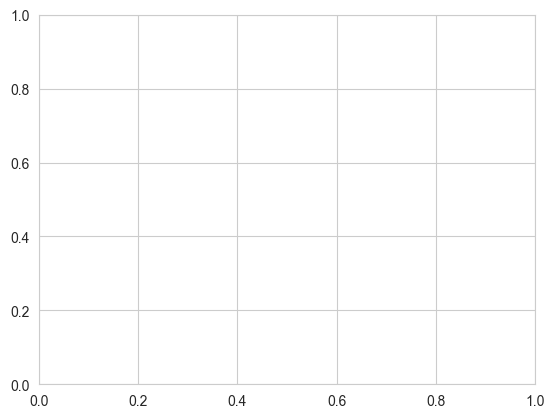

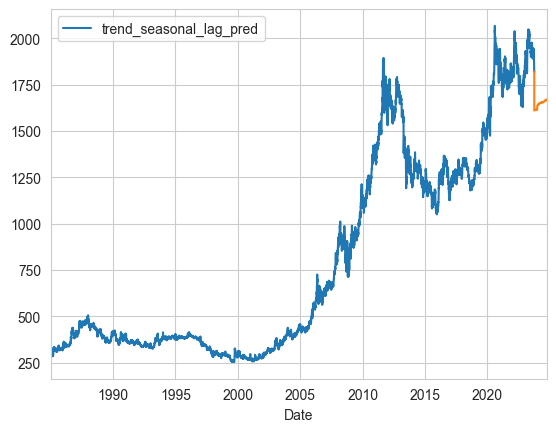

In [53]:
fig, axes = plt.subplots(1,1);
ax = plot_df[1:].join(pd.DataFrame({"trend_seasonal_lag_pred":ypred_train_tsl},index=plot_df[1:].index))[['trend_seasonal_lag_pred']].plot()
_ = df_forecast['future_forecast'].plot(ax=ax)
fig.show()
